In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def showImage(image):
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.set_cmap('gray')
    plt.imshow((image))

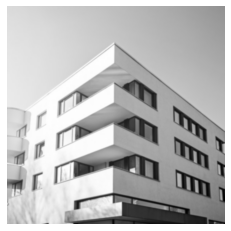

In [8]:
image = cv2.imread('1.jpg')
image = cv2.GaussianBlur(image, (5, 5), 0)
plt.axis('off')
plt.imshow(image)

In [9]:
def Canny(image, weakThreshold = 50, strongThreshold = 100):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5, 5), 0)
    gx = cv2.Sobel(image, cv2.CV_64F, 1, 0)
    gy = cv2.Sobel(image, cv2.CV_64F, 0, 1)
    absX = cv2.convertScaleAbs(gx)# 轉回uint8
    absY = cv2.convertScaleAbs(gy)


    mat, angle = cv2.cartToPolar(gx, gy, angleInDegrees = True)
    width, height = image.shape
    print(image.shape)
    for i in range(width-1):
        for j in range(height-1):
            gradAngle = angle[i][j]
            if(gradAngle<=22.5):#左右
                x1, y1 = i-1, j
                x2, y2 = i+1, j
            elif(22.5 < gradAngle <= (22.5+45)):#右上，左下
                x1, y1 = i-1, j-1
                x2, y2 = i+1, j+1
            elif((22.5+45) < gradAngle <= (22.5+90)):#上下
                x1, y1 = i, j+1
                x2, y2 = i, j-1
            elif((22.5+90) < gradAngle <= (22.5+135)):#左上，右下
                x1, y1 = i-1, j+1
                x2, y2 = i+1, j-1
            elif((22.5+135) < gradAngle < (22.5+180)):#把圖補齊
                x1, y1 = i-1, j
                x2, y2 = i+1, j
            if(mat[i][j] < max(mat[x1][y1], mat[x2][y2]) ):
                mat[i, j] = 0
    
    mat[mat < weakThreshold] = 0#低於第一threshold
    mat[(weakThreshold <= mat) & (mat < strongThreshold)] = weakThreshold#在第一threshold及第二threshold
    mat[mat >= strongThreshold] = strongThreshold#高於第二threshold
    #8連通檢查
    for i in range(1, width-1):
        for j in range(1, height-1):
            if (mat[i,j] == weakThreshold):
                if ((mat[i+1, j-1] == strongThreshold) or (mat[i+1, j] == strongThreshold) or (mat[i+1, j+1] == strongThreshold)
                    or (mat[i, j-1] == strongThreshold) or (mat[i, j+1] == strongThreshold)
                    or (mat[i-1, j-1] == strongThreshold) or (mat[i-1, j] == strongThreshold) or (mat[i-1, j+1] == strongThreshold)):
                    mat[i, j] = strongThreshold
                else:
                    mat[i, j] = 0
    return mat

(573, 573)


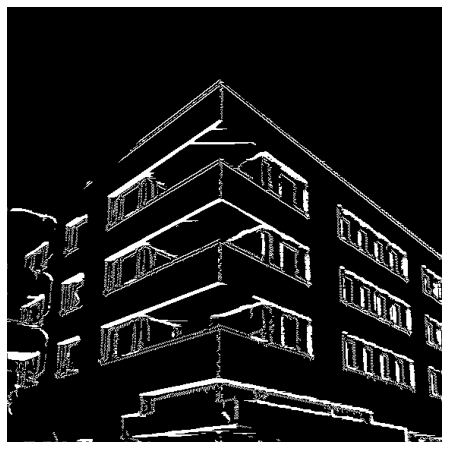

In [15]:
image = cv2.imread('1.jpg')
image = Canny(image, 30, 100)
cv2.imwrite('2_Canny.jpg', image)
showImage(image)

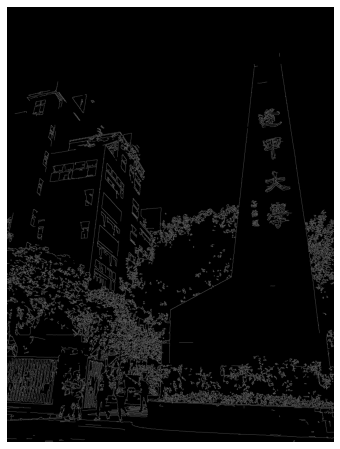

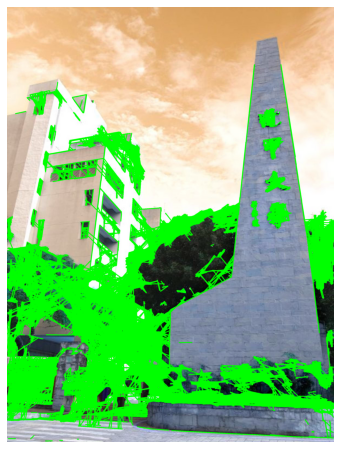

In [14]:
img = cv2.imread('2.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150)
showImage(edges)
minLineLength = 10
maxLineGap = 50
lines = cv2.HoughLinesP(edges,1,np.pi/180,50,None,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),5)

showImage(img)

In [13]:
from PIL import Image, ImageDraw
  
def add_watermark_to_image(image, watermark):
  rgba_image = image.convert('RGBA')
  rgba_watermark = watermark.convert('RGBA')
  
  image_x, image_y = rgba_image.size
  watermark_x, watermark_y = rgba_watermark.size
  
  # 縮放圖片
  scale = 10
  watermark_scale = max(image_x / (scale * watermark_x), image_y / (scale * watermark_y))
  new_size = (int(watermark_x * watermark_scale), int(watermark_y * watermark_scale))
  rgba_watermark = rgba_watermark.resize(new_size, resample=Image.ANTIALIAS)
  # 透明度
  rgba_watermark_mask = rgba_watermark.convert("L").point(lambda x: min(x, 180))
  rgba_watermark.putalpha(rgba_watermark_mask)
  
  watermark_x, watermark_y = rgba_watermark.size
  # 水印位置
  rgba_image.paste(rgba_watermark, (image_x - watermark_x, image_y - watermark_y), rgba_watermark_mask) #右下角
#   rgba_image.paste(rgba_watermark, (image_x - watermark_x, 0), rgba_watermark_mask) # 右上角
  
  return rgba_image
  
im_before = Image.open("2_Canny.jpg")
im_before.show()
  
im_watermark = Image.open("Alvin.png")
im_after = add_watermark_to_image(im_before, im_watermark)
im_after.save('2_Canny_W.png')